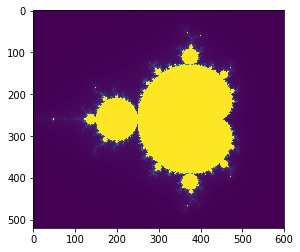

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X + 1j * Y
c = tf.constant(Z.astype(np.complex64))

zs = tf.Variable(c)
ns = tf.Variable(tf.zeros_like(c, tf.float32))

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

zs_ = zs * zs + c
not_diverged = tf.abs(zs_)  < 4
step = tf.group(zs.assign(zs_), ns.assign_add(tf.cast(not_diverged, "float32")))

for i in range(200):
    step.run()
    
plt.imshow(ns.eval())
plt.show()
